<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/ML-assignments/blob/K-Means/KMeans_CC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Clustering for Credit Card

**Context :**

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

**Objectives :**

* Segment customers based on behavior.
* Gain insights into customer preferences.
* Develop targeted marketing strategies.
* Improve marketing outcomes and customer relation

**Data Dictionary for Credit Card dataset :-**

CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user
MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [125]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [126]:
from google.colab import files
uploaded= files.upload()

Saving CC GENERAL.csv to CC GENERAL (1).csv


In [127]:
# :oading the dataset
df= pd.read_csv('CC GENERAL.csv')

In [128]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [129]:
df.shape

(8950, 18)

** There are 8950 rows and 18 columns.**

In [130]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Summary statistics

In [132]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [133]:
df.duplicated().sum()

0

** There are no duplicate values.**

In [134]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


** There are null values in Minimum payments and Credit limit columns.**

# Null value imputation

In [135]:
df['MINIMUM_PAYMENTS'].mean()           # using mean

864.2065423050828

In [136]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [137]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [138]:
df['CREDIT_LIMIT'].nunique()

205

In [139]:
df['CREDIT_LIMIT'].mean()

4494.449450364621

In [140]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)

In [141]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


**Now, there are no null values.**

In [142]:
df['BALANCE'].max()

19043.13856

In [143]:
df.groupby('TENURE')['TENURE'].count()

,TENURE
TENURE,
6,204
7,190
8,196
9,175
10,236
11,365
12,7584


In [144]:
df.groupby('BALANCE')['BALANCE_FREQUENCY'].mean()

,BALANCE_FREQUENCY
BALANCE,
0.000000,0.000000
0.000199,0.090909
0.001146,0.090909
0.001214,0.181818
0.001289,0.181818
...,...
16115.596400,1.000000
16259.448570,1.000000
16304.889250,1.000000


In [145]:
df.groupby('BALANCE')['PURCHASES'].sum()

,PURCHASES
BALANCE,
0.000000,21380.54
0.000199,0.01
0.001146,0.00
0.001214,0.00
0.001289,96.12
...,...
16115.596400,684.74
16259.448570,5024.68
16304.889250,1770.57


# Standardizing the data

In [146]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df_scaled= scaler.fit_transform(df.iloc[:,1:])

In [147]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [148]:
from sklearn.cluster import KMeans

# Elbow technique

In [149]:
wcss=[]
for i in range(1,15):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit (df_scaled)
  wcss.append(kmeans.inertia_)
  if i>2:
    break

In [150]:
wcss

[152149.99999999875, 128957.90955338141, 112609.01071221931]

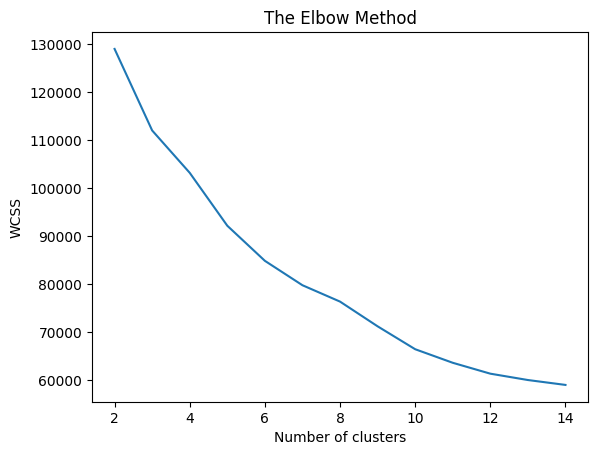

In [151]:
wcss=[]
for i in range(2,15):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit (df_scaled)
  wcss.append(kmeans.inertia_)


plt.plot(range(2,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Elbow point is at k=6.**


# Building the Model

In [152]:
# Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new=KMeans(6, random_state=42)
clusters_new.fit(df_scaled)

KMeans(n_clusters=6, random_state=42)

# checking the silhouette score


The Silhouette Score is a valuable metric for assessing the quality of clustering by measuring how well data points are assigned to their clusters and how distinct the clusters are from each other. It helps in determining the optimal number of clusters and evaluating the performance of different clustering algorithms


Interpretation:

Range: The Silhouette Score ranges from -1 to 1.

Ideal score: A score closer to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters, which is desirable.

Score near 0: A score near 0 indicates that the data point is on or very close to the decision boundary between two neighboring clusters, suggesting it could be assigned to either cluster.

Negative score: A score closer to -1 indicates that the data point might have been assigned to the wrong cluster, as it is more similar to data points in a neighboring cluster.


In [153]:
from sklearn.metrics import silhouette_score

# Assuming you have your scaled data in 'df_scaled' and your KMeans model in 'clusters_new'
silhouette_avg = silhouette_score(df_scaled, clusters_new.labels_)

print("For n_clusters =", clusters_new.n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 6 The average silhouette_score is : 0.202755081788085


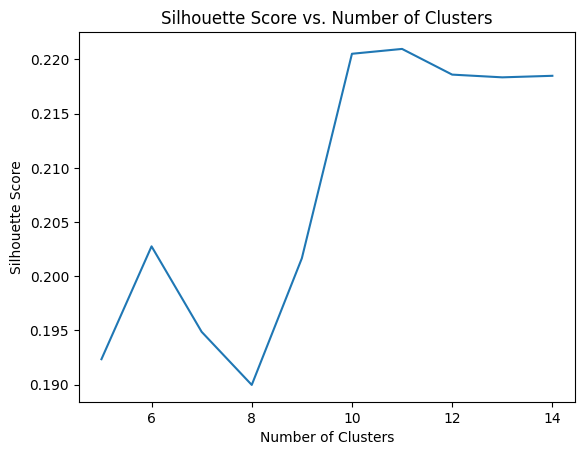

Optimal number of clusters: 11


In [154]:
# Plotting the silhouette score for different k values
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

silhouette_scores = []
for n_clusters in range(5, 15):  # Try different cluster numbers
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(5, 15), silhouette_scores)
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal number of clusters
optimal_n_clusters = range(5, 15)[silhouette_scores.index(max(silhouette_scores))]
print("Optimal number of clusters:", optimal_n_clusters)

In [155]:
# Building Cluster algorithm with k=11
from sklearn.cluster import KMeans
clusters_new=KMeans(11, random_state=42)
clusters_new.fit(df_scaled)

KMeans(n_clusters=11, random_state=42)

In [157]:
# Checking silhpuette score for k=11

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_scaled, clusters_new.labels_)

print("For n_clusters =", clusters_new.n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 11 The average silhouette_score is : 0.22096575441333918


**There is increase in the silhouette score for k=11.**

In [158]:
clusters_new.labels_

array([7, 3, 5, ..., 9, 9, 9], dtype=int32)

In [159]:
clusters_new.inertia_

64204.0810172912

In [160]:
df['clusterid_new'] = clusters_new.labels_

In [161]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusterid_new
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


In [162]:
df[df['clusterid_new']==1]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusterid_new
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,1
17,C10018,41.089489,0.454545,519.00,0.00,519.00,0.000000,0.416667,0.000000,0.333333,0.000000,0,8,2500.0,254.590662,73.203221,0.250000,12,1
63,C10065,7.152356,0.090909,840.00,840.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1600.0,0.000000,864.206542,0.000000,12,1
81,C10085,81.584711,0.272727,0.00,0.00,0.00,2985.300006,0.000000,0.000000,0.000000,0.166667,5,0,9500.0,116.569033,164.692136,0.000000,12,1
82,C10086,3.786310,0.636364,133.05,28.20,104.85,0.000000,0.416667,0.166667,0.250000,0.000000,0,5,12000.0,210.053432,99.533735,0.444444,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8812,C19052,8.549640,0.400000,0.00,0.00,0.00,56.339491,0.000000,0.000000,0.000000,0.100000,1,0,1200.0,149.134420,70.937243,0.500000,10,1
8829,C19070,17.097059,0.333333,306.25,0.00,306.25,0.000000,0.777778,0.000000,0.666667,0.000000,0,7,1500.0,711.607214,41.249133,0.250000,9,1
8832,C19073,7.472600,0.333333,63.40,35.09,28.31,0.000000,0.222222,0.111111,0.111111,0.000000,0,2,500.0,83.417439,106.028116,0.000000,9,1
8843,C19084,751.590839,0.444444,2000.00,2000.00,0.00,0.000000,0.111111,0.111111,0.000000,0.000000,0,1,2000.0,265.918137,353.102768,0.000000,9,1


In [163]:
df[df['clusterid_new']==2]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusterid_new
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.000000,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.000000,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.000000,12,2
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.000000,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.000000,12,2
12,C10013,1516.928620,1.000000,3217.99,2500.23,717.76,0.0,1.000000,0.250000,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.250000,12,2
13,C10014,921.693369,1.000000,2137.93,419.96,1717.97,0.0,0.750000,0.166667,0.750000,0.0,0,26,7500.0,1655.891435,251.137986,0.083333,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8827,C19068,30.175490,1.000000,235.71,0.00,235.71,0.0,1.000000,0.000000,0.888889,0.0,0,9,1500.0,171.066972,128.961432,0.857143,9,2
8836,C19077,112.037368,1.000000,1006.69,0.00,1006.69,0.0,1.000000,0.000000,0.888889,0.0,0,11,1000.0,1000.036596,123.408318,1.000000,9,2
8847,C19088,224.692470,0.888889,1112.07,0.00,1112.07,0.0,0.888889,0.000000,0.777778,0.0,0,44,1500.0,900.366427,151.429715,0.000000,9,2
8849,C19090,6.992117,0.888889,96.64,0.00,96.64,0.0,0.888889,0.000000,0.777778,0.0,0,8,1500.0,88.431789,107.505870,0.000000,9,2


In [164]:
df[df['clusterid_new']==5]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusterid_new
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
33,C10034,125.660453,1.000000,636.79,636.79,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,11,1200.0,423.449696,196.301885,0.300000,12,5
41,C10043,784.889762,0.909091,1526.59,786.30,740.29,2188.419607,0.583333,0.416667,0.333333,0.250000,11,27,3000.0,1262.309666,363.142736,0.111111,12,5
51,C10053,1078.888565,1.000000,3107.85,2221.74,886.11,0.000000,0.666667,0.583333,0.500000,0.000000,0,18,2500.0,1399.828340,1322.446601,0.000000,12,5
53,C10055,464.674156,0.888889,1979.22,1979.22,0.00,1981.265503,0.666667,0.666667,0.000000,0.111111,1,11,3000.0,3110.052742,132.446091,0.200000,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,C18930,263.636920,0.727273,1350.70,1060.70,290.00,0.000000,0.666667,0.500000,0.250000,0.000000,0,17,1500.0,837.745205,196.198784,0.000000,12,5
8716,C18953,477.847191,1.000000,1006.00,942.12,63.88,0.000000,0.833333,0.750000,0.166667,0.000000,0,24,500.0,561.212055,459.735118,0.000000,12,5
8725,C18962,1374.266113,1.000000,1814.30,1596.80,217.50,0.000000,0.666667,0.333333,0.416667,0.000000,0,10,6500.0,2668.399516,413.987806,0.000000,12,5
8801,C19041,275.020950,1.000000,1943.00,1943.00,0.00,0.000000,0.600000,0.600000,0.000000,0.000000,0,9,500.0,1438.120632,142.241273,0.555556,10,5


In [165]:
df['clusterid_new'].value_counts()

,count
clusterid_new,
7,2393
2,1910
1,1157
3,1018
5,853
8,639
9,611
0,180
4,123


In [166]:

cluster_groups = df.groupby('clusterid_new')['PURCHASES'].mean()
cluster_groups


,PURCHASES
clusterid_new,
0,1042.093944
1,333.472126
2,885.377340
3,354.046071
4,9238.374634
5,1534.278312
6,883.176591
7,226.327814
8,3869.154836


In [167]:

cluster_bal = df.groupby('clusterid_new')['BALANCE'].mean()
cluster_bal


,BALANCE
clusterid_new,
0,5266.573348
1,101.997933
2,723.607727
3,4478.407436
4,4788.760034
5,1037.255592
6,4021.314923
7,1351.941820
8,2297.179860


In [168]:
# Assuming you have your data in a pandas DataFrame called 'df'
# and the cluster labels are stored in a column called 'clusterid_new'

# Group data by cluster
cluster_groups = df.groupby('clusterid_new')[['BALANCE', 'PURCHASES', 'PAYMENTS']]

# Calculate descriptive statistics for each cluster
# Explicitly specify numeric_only=True to handle non-numeric columns
cluster_stats = cluster_groups.agg(['mean', 'median', 'std'], numeric_only=True)

# Print the cluster statistics
print(cluster_stats)

                   BALANCE                               PURCHASES             \
                      mean       median          std          mean     median   
clusterid_new                                                                   
0              5266.573348  4928.416929  3114.092254   1042.093944    367.405   
1               101.997933    23.111629   223.666578    333.472126    161.500   
2               723.607727   257.215269   972.708886    885.377340    645.475   
3              4478.407436  4141.095044  2623.751091    354.046071     36.485   
4              4788.760034  3879.064446  4007.348343   9238.374634   9030.080   
5              1037.255592   490.160040  1225.393457   1534.278312   1324.820   
6              4021.314923  3189.998798  2353.433725    883.176591    355.285   
7              1351.941820  1140.918130  1033.048557    226.327814     45.650   
8              2297.179860  1579.158781  2234.311159   3869.154836   3535.800   
9               847.594304  

In [169]:
# Assuming you have your data in a pandas DataFrame called 'df'
# and the cluster labels are stored in a column called 'clusterid_new'

# Group data by cluster
cluster_groups = df.groupby('clusterid_new')[['BALANCE', 'PURCHASES', 'PAYMENTS']]

# Calculate descriptive statistics for each cluster
# Explicitly specify numeric_only=True to handle non-numeric columns
cluster_stats = cluster_groups.agg(['mean', 'median', 'std'], numeric_only=True)

# Print the cluster statistics
print(cluster_stats)

                   BALANCE                               PURCHASES             \
                      mean       median          std          mean     median   
clusterid_new                                                                   
0              5266.573348  4928.416929  3114.092254   1042.093944    367.405   
1               101.997933    23.111629   223.666578    333.472126    161.500   
2               723.607727   257.215269   972.708886    885.377340    645.475   
3              4478.407436  4141.095044  2623.751091    354.046071     36.485   
4              4788.760034  3879.064446  4007.348343   9238.374634   9030.080   
5              1037.255592   490.160040  1225.393457   1534.278312   1324.820   
6              4021.314923  3189.998798  2353.433725    883.176591    355.285   
7              1351.941820  1140.918130  1033.048557    226.327814     45.650   
8              2297.179860  1579.158781  2234.311159   3869.154836   3535.800   
9               847.594304  

Cluster 0: It has high balance, with moderate purchases and payments.

Cluster 1: It has low balance and purchases with moderate payments.

Cluster 2: It has moderate balance, purchases and payments.

Cluster 3: It has high balance, low purchase and moderate payments.

Cluster 4: It has relatively low balance and high purchase and payments,

Cluster 5: It has relatively moderately low balance and high purchase and payments.

Cluster 6: It has significantly high balance and low purchase and payments.

Cluster 7: It has moderate balance and payments with significantly low purchase.

Cluster 8: It has comparatively low balance with moderate purchases and payments.

Cluster 9: It has comparatively moderate balance, purchases and payments.

Cluster 10: It has comparatively high balance and moderate purchases and payments.

# Conclusion:

In this analysis, we applied KMeans clustering to segment credit card customers based on their usage behavior and purchasing patterns. We leveraged the Elbow method and the Silhouette score to determine the optimal number of clusters, which was identified as 6 or 7 and 11 clusters , respectively.